# Exploration: Endometrical Cancer Dataset

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import pickle
import warnings
import sys
sys.path.append("..")
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

## Data exploration

mainly visualising the data

In [8]:
# setup
fs_title = 24
fs_label = 18

low, high = -10, 10
xlim = [low, high]
ylim = [low, high]
zlim = [low, high]

In [4]:
data = pd.read_csv("../data/endometrial/endometrial.dat", 
                   sep=r"\s+", header=0)
data.shape

(79, 4)

In [5]:
# standardize the fatures PI and EH
X = data[["PI", "EH", "NV"]].to_numpy()
X[:,0] = (X[:, 0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:, 1] - X[:,1].mean()) / X[:,1].std()
X[:,2] = X[:,2] - .5

# add intercept
X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
# print(f"inspect head of data:\n {X[:10, :]}")

# separate the labels 
y = data["HG"].to_numpy()
# print(f"inspect head of labels:\n {y[:10]}")

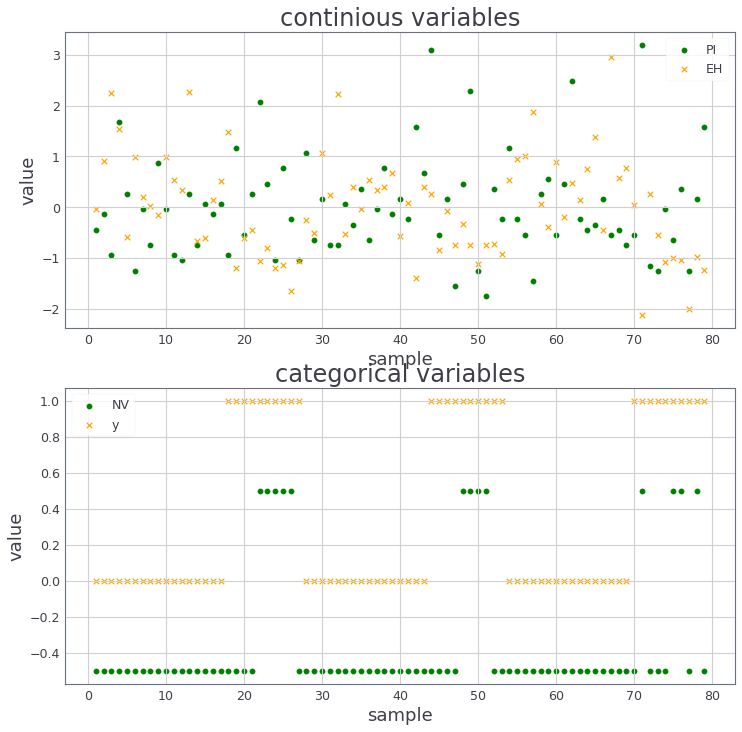

In [27]:
fig = plt.figure(figsize=(12,12))

x_values = np.arange(1, X.shape[0]+1)

ax1 = fig.add_subplot(211)
ax1.scatter(x_values, X[:,1], color="green", marker="o", label="PI")
ax1.scatter(x_values, X[:,2], color="orange", marker="x", label="EH")
ax1.set_title("continious variables", fontsize=fs_title)
ax1.set_xlabel("sample", fontsize=fs_label)
ax1.set_ylabel("value", fontsize=fs_label)
ax1.legend()

ax3 = fig.add_subplot(212)
ax3.scatter(x_values, X[:,3], color="green", marker="o", label="NV")
ax3.scatter(x_values, y, color="orange", marker="x", label="y")
ax3.set_title("categorical variables", fontsize=fs_title)
ax3.set_xlabel("sample", fontsize=fs_label)
ax3.set_ylabel("value", fontsize=fs_label)
ax3.legend()

plt.savefig("../../seminar_paper/figures/endometrial_data.png", transparent=True)
plt.show();


## Model visualisation

visualising the models with their sampled parameters 

In [94]:
mask_positive = y == 1
mask_negative = y == 0
print(f"positive samples: {np.sum(mask_positive)}")
print(f"negative samples: {np.sum(mask_negative)}")

positive samples: 30
negative samples: 49


In [53]:
def pred_with_params(beta):
    """Predicts with the current set of parameters. """
    y_hat_mh = 1 / (1 + np.exp(-1 * X @ beta))
    y_hat_mh.shape
    return y_hat_mh

In [51]:
def bin_cross_entropy(y, y_hat):
    """Computes the binary cross-entropy. 
    
    :param y: ground truth labels
    :param y_hat: predictions 
    :returns: BCE loss
    """
    bce = 1 / y.shape[0] * np.sum(y * np.log(y_hat) + (1-y) * np.log(1-y_hat_mh))
    return -1 * bce

#### Predict on the training data and evaluate on BCE loss

In [95]:
print("Metropolis result:")
beta_mh = np.array([2.271, -.455, -2.1, 8.216])
y_hat_mh = pred_with_params(beta_mh)
print(f"{bin_cross_entropy(y, y_hat_mh):.4f}")

Metropolis result:
0.3659


In [67]:
print("All ones result:")
beta_ones = np.array([2.81266224, -0.47419567, -2.13231312,  8.30476783])
y_hat_ones = pred_with_params(beta_ones)
print(f"{bin_cross_entropy(y, y_hat_ones):.4f}")

All ones result:
0.3071


In [66]:
print("Uniform result:")
beta_uni = np.array([3.59941959, -0.43042729, -2.02844551,  9.9455305])
y_hat_uni = pred_with_params(beta_uni)
print(f"{bin_cross_entropy(y, y_hat_uni):.4f}")

All uniform result:
0.3126


In [65]:
print("Std. normal result:")
beta_std = np.array([1.32149763, -0.417508  , -2.03948978,  5.32648382])
y_hat_std = pred_with_params(beta_std)
print(f"{bin_cross_entropy(y, y_hat_std):.4f}")

All std. normal result:
0.3094


In [96]:
print("Std. normal and var * 10 result:")
beta_std10 = np.array([0.73626475, -0.45933214, -2.2398439 ,  4.17063627])
y_hat_std10 = pred_with_params(beta_std10)
print(f"{bin_cross_entropy(y, y_hat_std10):.4f}")

Std. normal and var * 10 result:
0.3079


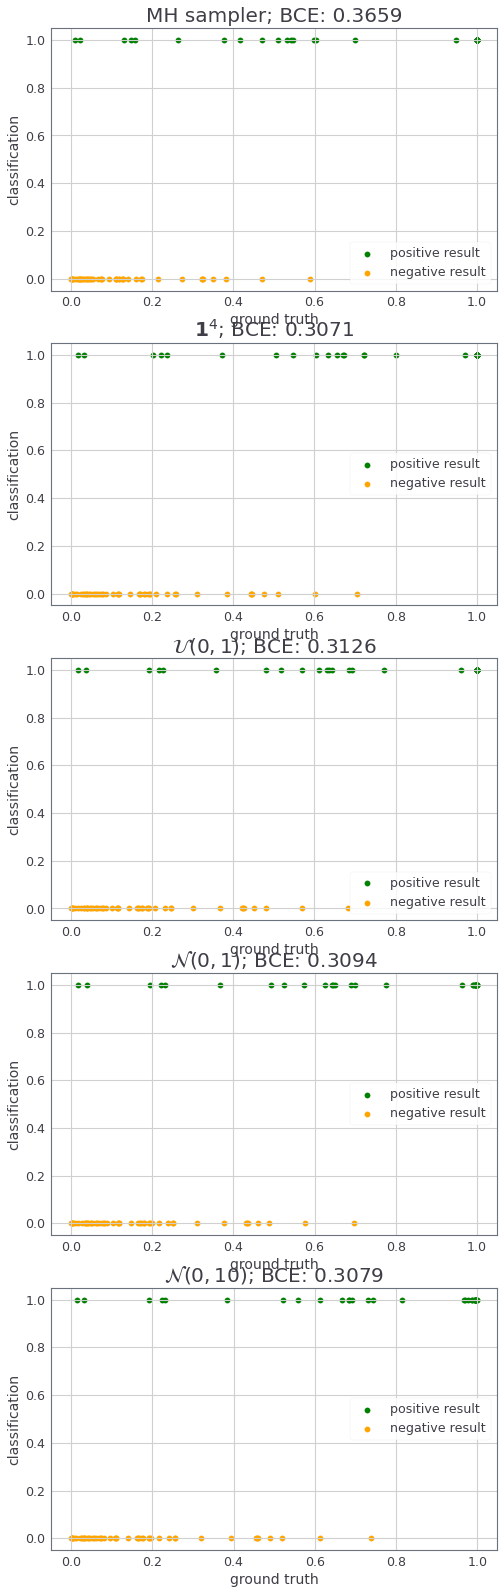

In [135]:
# y_pos = y[mask_positive]
# y_neg = y[mask_negative]

# fig = plt.figure(figsize=(8,28))

# ax1 = fig.add_subplot(511)
# ax1.scatter(y_hat_mh[mask_positive], y_pos, color="green", marker="o", 
#     label="positive result")
# ax1.scatter(y_hat_mh[mask_negative], y_neg, color='orange', marker="o", 
#     label="negative result")
# ax1.set_title(f"MH sampler; BCE: {bin_cross_entropy(y, y_hat_mh):.4f}", 
#     fontsize=fs_title-4)
# ax1.set_xlabel("ground truth", fontsize=fs_label-4)
# ax1.set_ylabel("classification", fontsize=fs_label-4)
# ax1.legend()

# ax2 = fig.add_subplot(512)
# ax2.scatter(y_hat_ones[mask_positive], y_pos, color="green", marker="o", 
#     label="positive result")
# ax2.scatter(y_hat_ones[mask_negative], y_neg, color='orange', marker="o", 
#     label="negative result")
# ax2.set_title(r"$\mathbf{1}^4$;" + f" BCE: {bin_cross_entropy(y, y_hat_ones):.4f}", 
#     fontsize=fs_title-4)
# ax2.set_xlabel("ground truth", fontsize=fs_label-4)
# ax2.set_ylabel("classification", fontsize=fs_label-4)
# ax2.legend()

# ax3 = fig.add_subplot(513)
# ax3.scatter(y_hat_uni[mask_positive], y_pos, color="green", marker="o", 
#     label="positive result")
# ax3.scatter(y_hat_uni[mask_negative], y_neg, color='orange', marker="o", 
#     label="negative result")
# ax3.set_title(r"$\mathcal{U}(0, 1)$;" + f" BCE: {bin_cross_entropy(y, y_hat_uni):.4f}", 
#     fontsize=fs_title-4)
# ax3.set_xlabel("ground truth", fontsize=fs_label-4)
# ax3.set_ylabel("classification", fontsize=fs_label-4)
# ax3.legend()

# ax4 = fig.add_subplot(514)
# ax4.scatter(y_hat_std[mask_positive], y_pos, color="green", marker="o", 
#     label="positive result")
# ax4.scatter(y_hat_std[mask_negative], y_neg, color='orange', marker="o", 
#     label="negative result")
# ax4.set_title(r"$\mathcal{N}(0, 1)$;" + f" BCE: {bin_cross_entropy(y, y_hat_std):.4f}", 
#     fontsize=fs_title-4)
# ax4.set_xlabel("ground truth", fontsize=fs_label-4)
# ax4.set_ylabel("classification", fontsize=fs_label-4)
# ax4.legend()

# ax5 = fig.add_subplot(515)
# ax5.scatter(y_hat_std10[mask_positive], y_pos, color="green", marker="o", 
#     label="positive result")
# ax5.scatter(y_hat_std10[mask_negative], y_neg, color='orange', marker="o", 
#     label="negative result")
# ax5.set_title(r"$\mathcal{N}(0, 10)$;" + f" BCE: {bin_cross_entropy(y, y_hat_std10):.4f}", 
#     fontsize=fs_title-4)
# ax5.set_xlabel("ground truth", fontsize=fs_label-4)
# ax5.set_ylabel("classification", fontsize=fs_label-4)
# ax5.legend()

# # plt.savefig("../../seminar_paper/figures/endometrial_classification.png", transparent=True)
# plt.show();

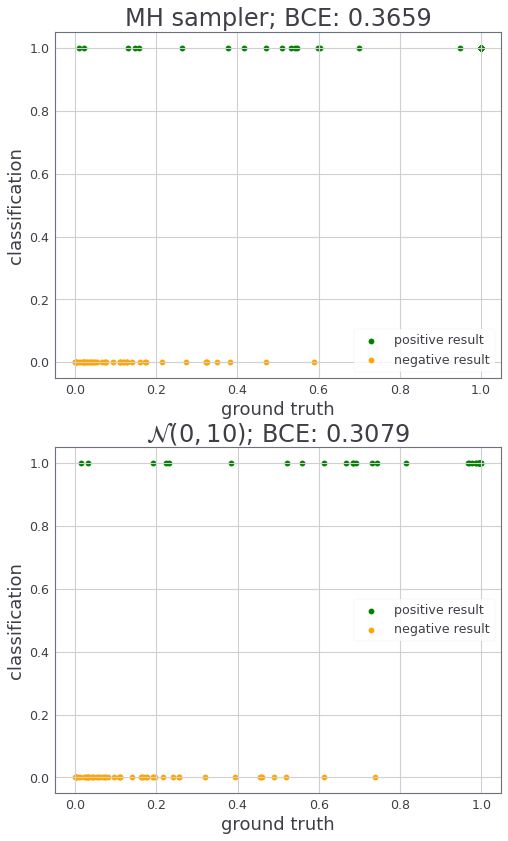

In [139]:
y_pos = y[mask_positive]
y_neg = y[mask_negative]

fig = plt.figure(figsize=(8,14))

ax1 = fig.add_subplot(211)
ax1.scatter(y_hat_mh[mask_positive], y_pos, color="green", marker="o", 
    label="positive result")
ax1.scatter(y_hat_mh[mask_negative], y_neg, color='orange', marker="o", 
    label="negative result")
ax1.set_title(f"MH sampler; BCE: {bin_cross_entropy(y, y_hat_mh):.4f}", 
    fontsize=fs_title)
ax1.set_xlabel("ground truth", fontsize=fs_label)
ax1.set_ylabel("classification", fontsize=fs_label)
ax1.legend()

ax5 = fig.add_subplot(212)
ax5.scatter(y_hat_std10[mask_positive], y_pos, color="green", marker="o", 
    label="positive result")
ax5.scatter(y_hat_std10[mask_negative], y_neg, color='orange', marker="o", 
    label="negative result")
ax5.set_title(r"$\mathcal{N}(0, 10)$;" + f" BCE: {bin_cross_entropy(y, y_hat_std10):.4f}", 
    fontsize=fs_title)
ax5.set_xlabel("ground truth", fontsize=fs_label)
ax5.set_ylabel("classification", fontsize=fs_label)
ax5.legend()

plt.savefig("../../seminar_paper/figures/endometrial_classification.png", transparent=True)
plt.show();